# Open up the local disk

In [23]:
import coiled

In [24]:
cluster = coiled.Cluster(n_workers=10)
client = cluster.get_client()

Output()

╭────────────────────────────────────────── Package Info ──────────────────────────────────────────╮
│                           ╷                                                                      │
│   Package                 │ Note                                                                 │
│ ╶─────────────────────────┼────────────────────────────────────────────────────────────────────╴ │
│   coiled_local_coiled     │ Source wheel built from C:\Users\gavargas\Developer\coiled           │
│                           ╵                                                                      │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

In [25]:
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt

In [26]:
local_dataset = xr.open_mfdataset("s3://nova-scotia-gavargas", engine="zarr")

In [27]:
local_dataset.data

<xarray.DataArray 'data' (iline: 595, xline: 476, twt: 1501)>
dask.array<open_dataset-data, shape=(595, 476, 1501), dtype=float32, chunksize=(75, 60, 188), chunktype=numpy.ndarray>
Coordinates:
  * iline    (iline) uint16 1003 1004 1005 1006 1007 ... 1594 1595 1596 1597
  * twt      (twt) float64 0.0 4.0 8.0 12.0 ... 5.992e+03 5.996e+03 6e+03
  * xline    (xline) uint16 1003 1004 1005 1006 1007 ... 1475 1476 1477 1478

# Compute attributes

In [28]:
from d2geo.attributes.CompleTrace import ComplexAttributes
from d2geo.attributes.SignalProcess import SignalProcess

In [29]:
complex_attribute = ComplexAttributes()
signal_process = SignalProcess()

In [35]:
result = complex_attribute.envelope(darray=local_dataset.data)
# result = signal_process.histogram_equalization(darray=local_dataset.seismic)
# result = signal_process.histogram_equalization(darray=local_dataset.seismic)

h:\Miniconda\envs\coiled_test2\Lib\site-packages\dask\array\core.py:3470: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(


In [27]:
result =  result.rechunk((595, 476, "auto"))

In [36]:
result

dask.array<_trim, shape=(595, 476, 1525), dtype=float32, chunksize=(62, 62, 1525), chunktype=numpy.ndarray>

In [32]:
result = result.persist()

In [12]:
local_dataset = local_dataset.persist()

In [12]:
result.to_zarr("s3://nova-scotia-gavargas/complex_attributes2", mode="w", compute=True)

h:\Miniconda\envs\coiled_test2\Lib\site-packages\zarr\creation.py:295: UserWarning: ignoring keyword argument 'mode'
  warn("ignoring keyword argument %r" % k)


In [41]:
cluster.shutdown()

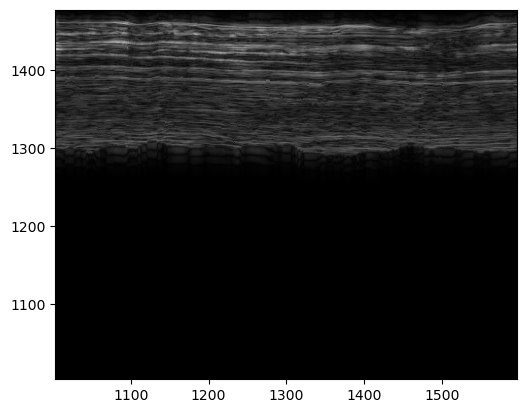

In [40]:
plt.imshow((result[250, :, :]**(1/1.8)).T.compute(), cmap="gray", extent=[local_dataset.iline[0], local_dataset.iline[-1], local_dataset.xline[0], local_dataset.xline[-1]])
# plt.imshow((result[:, :, 250]**(1/1.8)).T.compute(), cmap="gray", extent=[local_dataset.iline[0], local_dataset.iline[-1], local_dataset.xline[0], local_dataset.xline[-1]])

In [21]:
client.close()